# **1. Import Library**

In [7]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

# **2. Membaca data file CSV**

In [3]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving calonpembelimobil.csv to calonpembelimobil.csv


In [9]:
import pandas as pd

# Membaca dataset calon pembeli mobil
data = pd.read_csv("calonpembelimobil.csv")
data.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


# **3. Melihat Informasi Dataset**

In [10]:
data.info()

print("\nJumlah nilai kosong tiap kolom:")
print(data.isnull().sum())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB

Jumlah nilai kosong tiap kolom:
ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


# **4. Memisahkan Fitur (X) dan Target (y)**

In [12]:
X = data.drop(columns=['Beli_Mobil'])
y = data['Beli_Mobil']

# Menampilkan 5 baris pertama dari X dan y
print("Fitur (X):")
display(X.head())

print("\nTarget (y):")
print(y.head())

Fitur (X):


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
0,1,32,1,0,0,240
1,2,49,2,1,1,100
2,3,52,1,0,2,250
3,4,26,2,1,1,130
4,5,45,3,0,2,237



Target (y):
0    1
1    0
2    1
3    0
4    1
Name: Beli_Mobil, dtype: int64


# **5. Membagi Data Menjadi Data Latih (Training) dan Data Uji (Testing)**

In [13]:
from sklearn.model_selection import train_test_split

# Membagi data: 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada masing-masing set
print("Jumlah data latih :", len(X_train))
print("Jumlah data uji   :", len(X_test))

Jumlah data latih : 800
Jumlah data uji   : 200


# **6. Membuat dan Melatih Model Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept dari model
print("Koefisien model:", model.coef_)
print("Intercept model:", model.intercept_)

Koefisien model: [[-3.34309475e-04 -8.86558772e-03 -1.90924316e-01 -1.25394830e+00
   1.42404794e-01  5.99587302e-02]]
Intercept model: [-11.92994817]


# **7. Melakukan Prediksi dan Evaluasi Model**

In [15]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Nilai evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Tabel hasil evaluasi
hasil_evaluasi = pd.DataFrame({
    "Metrik": ["Akurasi", "Presisi", "Recall", "F1-Score", "ROC-AUC Score"],
    "Nilai": [accuracy, precision, recall, f1, roc_auc]
}).round(4)

# Menampilkan hasil evaluasi dalam bentuk tabel interaktif
print("Hasil Evaluasi Model Logistic Regression:")
display(hasil_evaluasi)

# Classification report dalam bentuk tabel
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(4)

print("\n Classification Report:")
display(df_report)

# Confusion matrix dalam bentuk tabel
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(
    cm,
    index=["Actual: 0", "Actual: 1"],
    columns=["Predicted: 0", "Predicted: 1"]
)

print("\n Confusion Matrix:")
display(df_cm)


Hasil Evaluasi Model Logistic Regression:


,Metrik,Nilai
0,Akurasi,0.9400
1,Presisi,0.9675
2,Recall,0.9370
3,F1-Score,0.9520
4,ROC-AUC Score,0.9779



 Classification Report:


,precision,recall,f1-score,support
0,0.8961,0.9452,0.9200,73.00
1,0.9675,0.9370,0.9520,127.00
accuracy,0.9400,0.9400,0.9400,0.94
macro avg,0.9318,0.9411,0.9360,200.00
weighted avg,0.9414,0.9400,0.9403,200.00



 Confusion Matrix:


,Predicted: 0,Predicted: 1
Actual: 0,69,4
Actual: 1,8,119


# **8. Menampilkan Visualisasi Confusion Matrix dan Kurva ROC**

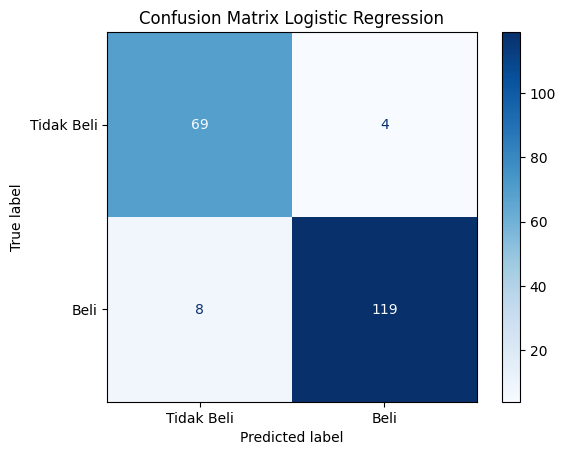

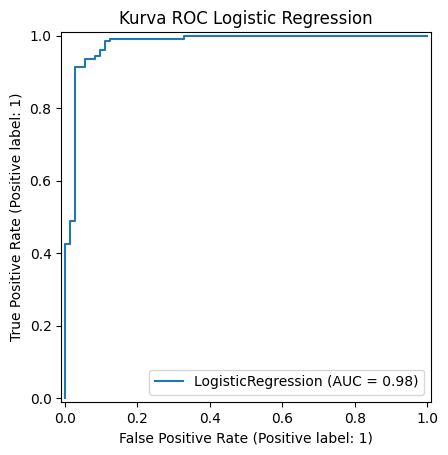

In [16]:
# Menampilkan visualisasi Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Beli', 'Beli'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.show()

# Menampilkan Kurva ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Kurva ROC Logistic Regression")
plt.show()